# Linear Regression using Gradient Descent

## Linear Regression by implementing of gradient descent algorithm

The linear regression line is defined as $$y = \theta_0 + \theta_1 x $$

The parameters $\theta_0$ and $\theta_1$ can be computed using gradeint descent algorithm.

Gradeint descent algorithm is given as:


repeat until convergence {
\begin{align*}
    \theta_1 &= \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m} \big ( h_\theta (x^{(i)}) - y^{(i)} \big ) * x^{(i)} \\
    \theta_0 &= \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m} \big ( h_\theta (x^{(i)}) - y^{(i)} \big )
\end{align*}
}

Reference: https://towardsdatascience.com/

### Step 1: Import libraries and dataset

In [1]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [2]:
## Import the dataset

data = pd.read_csv('salary_data.csv')
# change the path as necessary

X = data.iloc[:, 0]
Y = data.iloc[:, 1]

# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(30,)
(30,)


### Step 2: EDA , Preprocessing , Create the training data

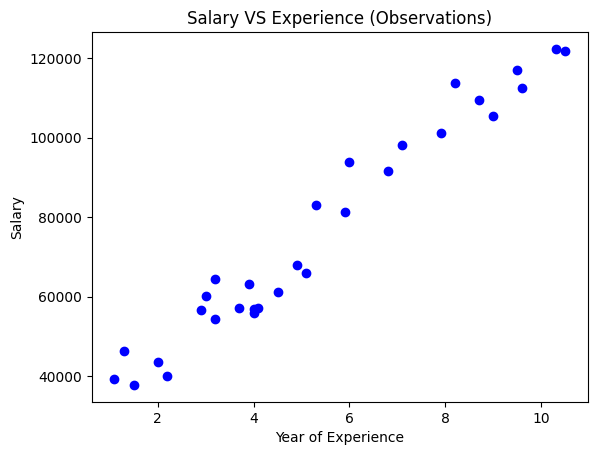

In [3]:
# Visualize the dataset

plt.scatter(X, Y, color='blue')
plt.title('Salary VS Experience (Observations)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [4]:
# Split the data into train vs test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Step 2 is skipped.


### Step 3: Train the machine learning model

In [12]:
# Build the model


theta1 = 0
theta0 = 0
#Y_pred = theta1 * X + theta0
alpha = 0.0001  # Learning Rate
epochs = 10000  # Number of iterations to perform gradient descent

m = float(len(X_train)) # Number of elements in X

cost_history = []

cost_onTestData_history = []

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = theta1 * X_train + theta0
    Y_Test_pred = theta1 * X_test + theta0

    temp1 = (-1/m) * sum(X_train * (y_train - Y_pred))
    temp0 = (-1/m) * sum(y_train - Y_pred)
    theta1 = theta1 - alpha * temp1
    theta0 = theta0 - alpha * temp0

    costTrain = (1/2*m) * sum((y_train - Y_pred)**2)
    costTest = (1/2*m) * sum((y_test - Y_Test_pred)**2)

    cost_history.append(costTrain)
    cost_onTestData_history.append(costTest)



### Step 4: Visualize the results

In [6]:
# The coefficients

# print the parameter theta1
print('Theta1 = ', theta1)
# print the parameter theta0
print('Theta0 = ', theta0)

Theta1 =  12180.083954896392
Theta0 =  6735.411768176466


### Step 5: Prediction

In [9]:
# Predict the values for the given X
Y_pred = theta1 * X_train + theta0
Y_pred

28    132190.276504
24    112702.142176
12     55455.747588
0      20133.504119
4      33531.596469
16     68853.839938
5      42057.655237
13     56673.755983
11     55455.747588
22    102958.075012
1      22569.520910
2      25005.537701
25    116356.167362
3      31095.579678
21     93214.007848
26    122446.209340
18     78597.907102
29    134626.293295
20     89559.982661
7      45711.680424
10     54237.739192
14     61545.789565
19     79815.915498
6      43275.663633
Name: YearsExperience, dtype: float64

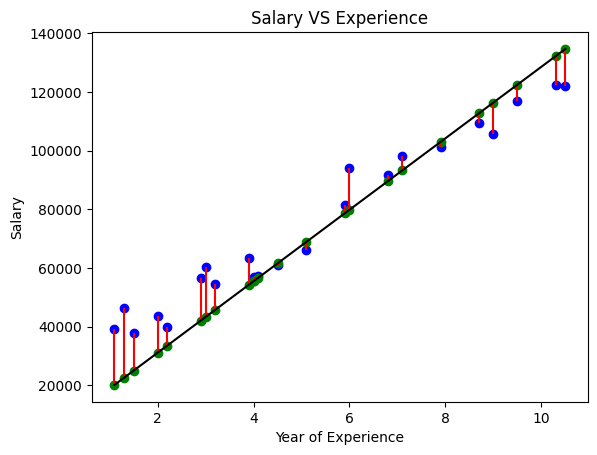

In [10]:
# Visualize the dataset and plot the residuals

fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color='blue')       # observed values
ax.scatter(X_train, Y_pred, color='green') # predicted values
ax.vlines(X_train,y_train, Y_pred, color='red')  # residual lines
plt.plot([min(X_train), max(X_train)], [min(Y_pred), max(Y_pred)], color='black')  # regression line

plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

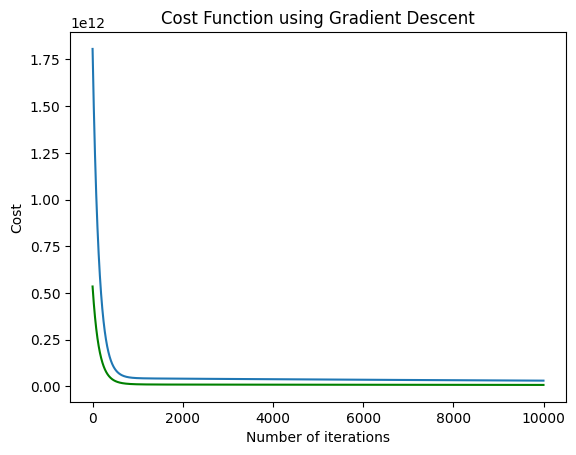

In [15]:
# plot the cost function

plt.plot(cost_history)
plt.plot(cost_onTestData_history, color="green")
plt.title('Cost Function using Gradient Descent')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

### Step 6: Model Evalaution & Assessment using Performance measures

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
print("Performance on Training Set")
# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(y_train, Y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(y_train, Y_pred))

Performance on Training Set
Mean squared error = 108556738.30
Variance score = 0.86


In [18]:
# Predict the values for the test data
Y_Test_pred = theta1 * X_test + theta0
print("Performance on Test Set")
# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(y_test, Y_Test_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(y_test, Y_Test_pred))

Performance on Test Set
Mean squared error = 115824890.93
Variance score = 0.77
